In [95]:
#Import the current version of the file (available for download at the link above), and isolate the columns of interest based on the variables you want to include
#Using the variable navigator provided by GSS, determine the years applicable and narrow your dataset accordingly.

import pandas as pd

columns = ['id', 'year', 'yearsjob', 'moredays', 'mustwork', 'famwkoff', 'wkvsfam', 'hrsrelax', 'secondwk', 'buyvalue',]
df = pd.read_stata("GSS7218_R1.dta", columns=columns)


#limiting dataset to the years we are interested in
df = df.loc[df['year'].isin({2006, 2014, 2018})]
print(df.head)

<bound method NDFrame.head of          id  year yearsjob moredays mustwork         famwkoff    wkvsfam hrsrelax secondwk buyvalue
46510     1  2006    15.00      0.0       no     Not too hard     Rarely      1.0       no      NaN
46511     2  2006     9.00     20.0      yes    Somewhat hard      Never      1.0       no      NaN
46512     3  2006      NaN      NaN      NaN              NaN        NaN      NaN      NaN      NaN
46513     4  2006     0.75      6.0      yes  Not at all hard      Never      7.0       no      NaN
46514     5  2006      NaN      NaN      NaN              NaN        NaN      NaN      NaN      NaN
...     ...   ...      ...      ...      ...              ...        ...      ...      ...      ...
64809  2344  2018     2.00      4.0       no    Somewhat hard  Sometimes      4.0       no      NaN
64810  2345  2018     2.00      1.0       no     Not too hard     Rarely      5.0       no      NaN
64811  2346  2018      NaN      NaN      NaN              NaN        N

In [82]:
# limit dataset to exclude records from individuals who refused
# to report their investment in company stock
df = df.loc[df['buyvalue'].notnull()]
print(df.head)

<bound method NDFrame.head of          id  year yearsjob moredays mustwork         famwkoff    wkvsfam hrsrelax  compwage buyvalue                     wealth
46563    54  2006     2.00     20.0       no  Not at all hard      Often      3.0       3.0     80.0           Less than $5,000
46606    97  2006    12.00      5.0       no  Not at all hard      Often      2.0       3.0    100.0                        NaN
46622   113  2006     2.00      5.0       no     Not too hard      Often     10.0   1 Lower      1.0     $500,000 to $1 million
46646   137  2006    13.00     20.0      yes    Somewhat hard  Sometimes      1.0       3.0    100.0       $250,000 to $500,000
46647   138  2006     0.75      4.0       no  Not at all hard  Sometimes      4.0  5 Higher    100.0       $250,000 to $500,000
46655   146  2006     6.00      5.0       no  Not at all hard  Sometimes      2.0       4.0     50.0     $500,000 to $1 million
46663   154  2006    15.00     30.0      yes  Not at all hard      Often  

In [94]:
# limit dataset to exclude records from individuals who refused
# to report their wealth estimate
df = df.loc[df['wealth'].notnull()]
print(df.head)

ValueError: Cannot convert float NaN to integer

In [84]:
# limit dataset to exclude records from individuals who refused
# to report their relaxation time amount
df = df.loc[df['hrsrelax'].notnull()]
print(df.head)

<bound method NDFrame.head of          id  year yearsjob moredays mustwork         famwkoff    wkvsfam hrsrelax  compwage buyvalue                     wealth
46563    54  2006     2.00     20.0       no  Not at all hard      Often      3.0       3.0     80.0           Less than $5,000
46622   113  2006     2.00      5.0       no     Not too hard      Often     10.0   1 Lower      1.0     $500,000 to $1 million
46646   137  2006    13.00     20.0      yes    Somewhat hard  Sometimes      1.0       3.0    100.0       $250,000 to $500,000
46647   138  2006     0.75      4.0       no  Not at all hard  Sometimes      4.0  5 Higher    100.0       $250,000 to $500,000
46655   146  2006     6.00      5.0       no  Not at all hard  Sometimes      2.0       4.0     50.0     $500,000 to $1 million
46663   154  2006    15.00     30.0      yes  Not at all hard      Often      0.0       3.0     51.0   $1 million to $2 million
46667   158  2006     7.00      0.0       no     Not too hard  Sometimes  

In [85]:
df.head()

,id,year,yearsjob,moredays,mustwork,famwkoff,wkvsfam,hrsrelax,compwage,buyvalue,wealth
46563,54,2006,2.00,20.0,no,Not at all hard,Often,3.0,3.0,80.0,"Less than $5,000"
46622,113,2006,2.00,5.0,no,Not too hard,Often,10.0,1 Lower,1.0,"$500,000 to $1 million"
46646,137,2006,13.00,20.0,yes,Somewhat hard,Sometimes,1.0,3.0,100.0,"$250,000 to $500,000"
46647,138,2006,0.75,4.0,no,Not at all hard,Sometimes,4.0,5 Higher,100.0,"$250,000 to $500,000"
46655,146,2006,6.00,5.0,no,Not at all hard,Sometimes,2.0,4.0,50.0,"$500,000 to $1 million"


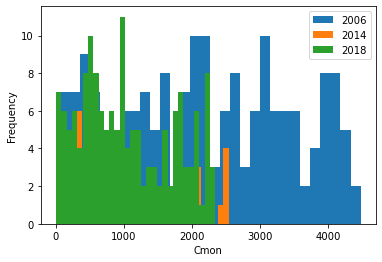

In [86]:
import matplotlib.pyplot as plt
df.groupby('year')['id'].plot(kind='hist', bins=30)
plt.xlabel('Cmon')
plt.legend();